In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path

JSON_PATH = path.join('/app','data', 'prs_por_orga_por_anio_filtrados.json')
print(JSON_PATH)

print('Reading data')
df = pd.read_json(JSON_PATH, lines=True)
print('Done')


/app/data/prs_por_orga_por_anio_filtrados.json
Reading data
Done


In [2]:
df.head()

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/Pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/Mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/Pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/Pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/NeatNerdPrime""",6182


In [12]:
data = pd.pivot_table(df, values='countStar', index=['year', 'month'], columns=['organizationUrl'], aggfunc=sum, margins=True)


In [27]:
with_counts = df.groupby(["organizationUrl", "month", "year"])['countStar'].sum().to_frame('countStar').reset_index()
with_counts

,organizationUrl,month,year,countStar
0,"""https://github.com/18F""",1,2016,681
1,"""https://github.com/18F""",1,2017,854
2,"""https://github.com/18F""",2,2016,825
3,"""https://github.com/18F""",2,2017,923
4,"""https://github.com/18F""",2,2018,532
...,...,...,...,...
3170,"""https://github.com/zys-contribs""",6,2019,1507
3171,"""https://github.com/zys-contribs""",7,2019,1528
3172,"""https://github.com/zys-contribs""",8,2019,1286
3173,"""https://github.com/zys-contribs""",11,2019,620


In [35]:
grouped = with_counts.groupby(["month", "year"]).apply(lambda x: x.sort_values(['countStar'], ascending = False)).reset_index(drop=True)
grouped
final_data = grouped.groupby(["month", "year"]).head(10)
final_data

,organizationUrl,month,year,countStar
0,"""https://github.com/mozilla""",1,2016,1472
1,"""https://github.com/dotnet""",1,2016,1199
2,"""https://github.com/alphagov""",1,2016,965
3,"""https://github.com/docker""",1,2016,958
4,"""https://github.com/guardian""",1,2016,922
...,...,...,...,...
3004,"""https://github.com/fakegit""",12,2019,3014
3005,"""https://github.com/dotnet""",12,2019,2564
3006,"""https://github.com/googleapis""",12,2019,2288
3007,"""https://github.com/Azure""",12,2019,2254


<AxesSubplot:xlabel='year,month'>

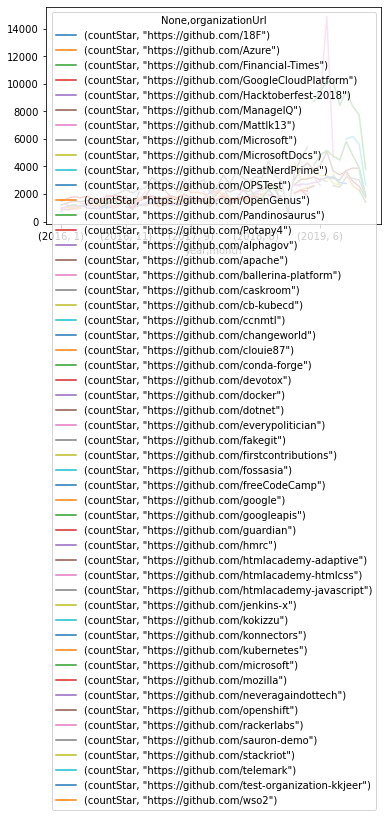

In [38]:
pd.pivot_table(final_data, index=['year', 'month'], columns=['organizationUrl']).plot()